## 1. Introduction

As our code in main is written for the synthetic data and have done meta-permuation instead of original permutation We are going to give tutorial for how to do a original permutation.  

In [2]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.path.dirname('pwd'))))))

## 2. Get dataset
Get dataset with OTU counts or Normalized-OTU counts(We've used TSS normalization) for various taxa level(in this case, we've used phylum level )

In [3]:
import copy
import numpy as np
import math
## an implementation for TSS normalization 
def datatransformation(w1):
    w2=copy.deepcopy(w1)
    n,d=np.shape(w2)
    if n==1:
         for j in range(d):
            if w2[0][j]==0:
                w2[0][j]=0
            else:
                w2[0][j]=math.log2(w2[0][j])
    else:
        for i in range(n):
            for j in range(d):
                if w2[i][j]==0:
                    w2[i][j]=0
                else:
                    w2[i][j]=math.log2(w2[i][j])
    return w2

In [4]:
import pandas as pd
import copy

xls = pd.ExcelFile('16A13800.xlsx')
xls2=pd.ExcelFile('3687A580.xlsx')
df = pd.read_excel(xls, 'Phylum%') ## in our case the data is given with percentile

feat = pd.read_excel(xls2, 'phylumabsenceratio') ## gets the absence ration that is priorly known, make it over than 1 if not known, and if it is not known, use data's absence ratio for estimation.  
feat_info=((feat['Unnamed: 1']).to_numpy())


df1=df.drop(df.columns[61:],axis=1)
n=df1.shape[1]
df1.columns= [i for i in range(n)]
x=[i%3 +1 for i in range(n) ]
t=['week']
for i in range(len(x)-1):
    t.append(x[i])
## add week row 
df1.loc[702]=t
df1=df1.drop(df1.index[5])
df1=df1.transpose()
df1= df1.rename(columns=df1.iloc[0])
df1=df1.drop(df1.index[0])
vacteriainfo=df1.columns[5:50]
# print(vacteriainfo)
vacdf=df1[vacteriainfo]

vacdf.index.name='prob'


## 3. Do Permuation 
you can set various hyperparameters for choosing. 

In [5]:
import argparse
parser = argparse.ArgumentParser(description='Args Sparse Simulation')
parser.add_argument('--p_num', type=int, default=10, help='num ber of permutation')
parser.add_argument('--x_grid_start',type=int, default=1,help='start of the x-axis')
parser.add_argument('--x_grid_end',type=int, default=20,help='end of the x-axis')
parser.add_argument('--same_ratio',type=int, default=90,help='Difference ratio for each group') ## only can choose 50,90, 100
parser.add_argument('--interval',type=float,default=0.1,help='interval for x-axis' )
parser.add_argument('--epsilon',type=float,default=0.0001,help='to_avoid zero division')
args, _ = parser.parse_known_args()

  0%|          | 0/10 [00:00<?, ?it/s]

Distance of Original Data :0.426828756604192


 10%|█         | 1/10 [00:09<01:21,  9.07s/it]

Distance for iteration1 0.03479169695926313
Distance of Original Data :0.29019551985346875


 20%|██        | 2/10 [00:17<01:11,  8.89s/it]

Distance for iteration1 14.000718700043782
Distance of Original Data :0.4836905354570366


 30%|███       | 3/10 [00:26<01:02,  8.90s/it]

Distance for iteration1 0.05919835960113746
Distance of Original Data :0.36117891669808716


 40%|████      | 4/10 [00:36<00:54,  9.12s/it]

Distance for iteration1 0.2809093275057925
Distance of Original Data :0.426828756604192


 50%|█████     | 5/10 [00:48<00:50, 10.19s/it]

Distance for iteration1 0.3968482589729362
Distance of Original Data :0.29019551985346875


 60%|██████    | 6/10 [00:59<00:42, 10.57s/it]

Distance for iteration1 0.3086620792052936
Distance of Original Data :0.44636825767219024


 70%|███████   | 7/10 [01:09<00:31, 10.43s/it]

Distance for iteration1 0.1752199411566252
Distance of Original Data :0.44636825767219024


 80%|████████  | 8/10 [01:19<00:20, 10.10s/it]

Distance for iteration1 0.3245385437068182
Distance of Original Data :0.36117891669808716


 90%|█████████ | 9/10 [01:28<00:10, 10.01s/it]

Distance for iteration1 1.1181171767344225
Distance of Original Data :0.5468079275209426


100%|██████████| 10/10 [01:37<00:00,  9.77s/it]

Distance for iteration1 0.1012103233796752
$p$-value for feature 1 is 0.0
$p$-value for feature 2 is 1.0
$p$-value for feature 3 is 0.0
$p$-value for feature 4 is 0.0
$p$-value for feature 5 is 0.0
$p$-value for feature 6 is 1.0
$p$-value for feature 7 is 0.0
$p$-value for feature 8 is 0.0
$p$-value for feature 9 is 1.0
$p$-value for feature 10 is 0.0


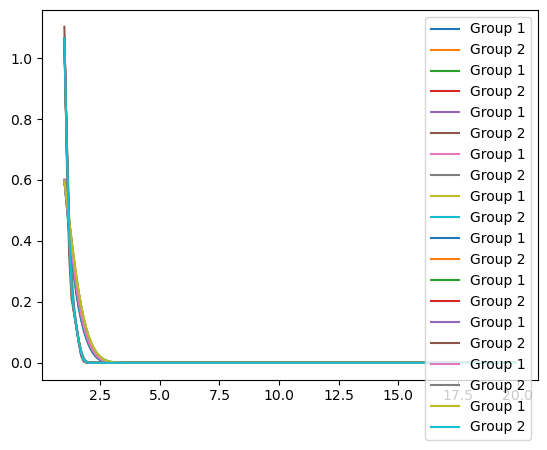

In [6]:
import math
import numpy as np
import matplotlib.pylab as plt
from src.Util import Permutator
import time
from tqdm import tqdm
## week 1 data
df_week1=df1[df1['week']==1]
df_week1=df_week1[vacteriainfo]
#df_week1 = df_week1.drop(['candidate_division_WPSUnclassified1', 'candidate_division_WPSUnclassified2'], axis=1)
#print(df_week1.columns)
## week 2 data
df_week2=df1[df1['week']==2]
df_week2=df_week2[vacteriainfo]
probdata1=df_week1.transpose().to_numpy()
probdata2=df_week2.transpose().to_numpy()
probdata1=probdata1.astype(np.float32)
probdata2=probdata2.astype(np.float32)
probdata1=datatransformation(probdata1)
probdata2=datatransformation(probdata2)
feat_info=np.zeros(12)

w1=np.negative(probdata1)
w2=np.negative(probdata2)
#print((w1))

pvals=[]
for i in tqdm(range(10)):
    p=Permutator(w1[0,:].reshape(1,20),w2[0,:].reshape(1,20), np.array([feat_info[i]]),args )
    pvals.append(p.permutation())
import sys

#sys.stdout = open('result.txt', 'w')

for i in range(10):
    print("$p$-value for feature {} is {}".format(i+1,pvals[i]))

#sys.stdout.close()